## Imports e Carregando os Dados

Estatísticas descritivas:
         Gravidez     Glicose     Pressao        Pele    Insulina         IMC  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         Pedigree       Idade    Diabetes  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.0

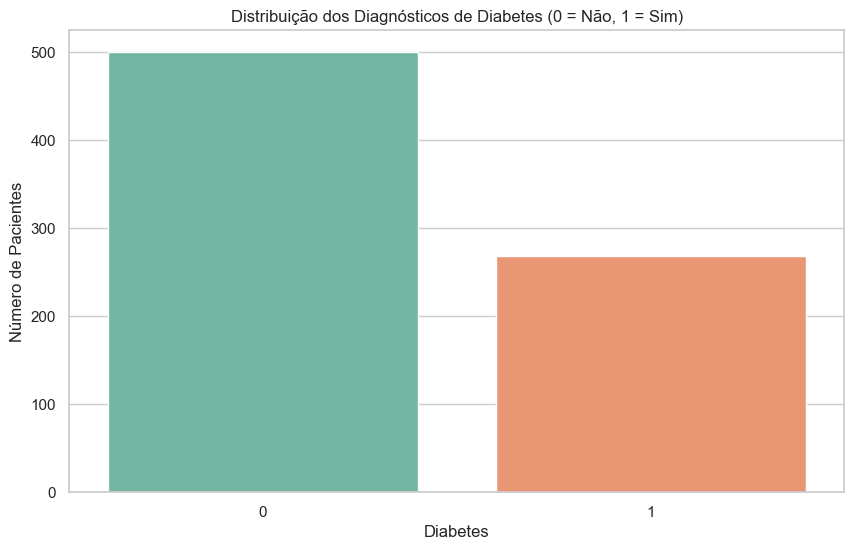

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

#Configurando o estilo do seaborn 
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

#Carregando os dados
df = pd.read_csv("dados/diabetes.csv")

#Renomeando as colunas para português
df.columns = ['Gravidez', 'Glicose', 'Pressao', 'Pele', 'Insulina', 'IMC', 'Pedigree', 'Idade', 'Diabetes']

#Estatísticas descritivas
print("Estatísticas descritivas:")
print(df.describe())

#Distribuição de classes
sns.countplot(data=df, x='Diabetes', palette='Set2')
plt.title("Distribuição dos Diagnósticos de Diabetes (0 = Não, 1 = Sim)")
plt.xlabel("Diabetes")
plt.ylabel("Número de Pacientes")
plt.show()


## Histograma das Variáveis

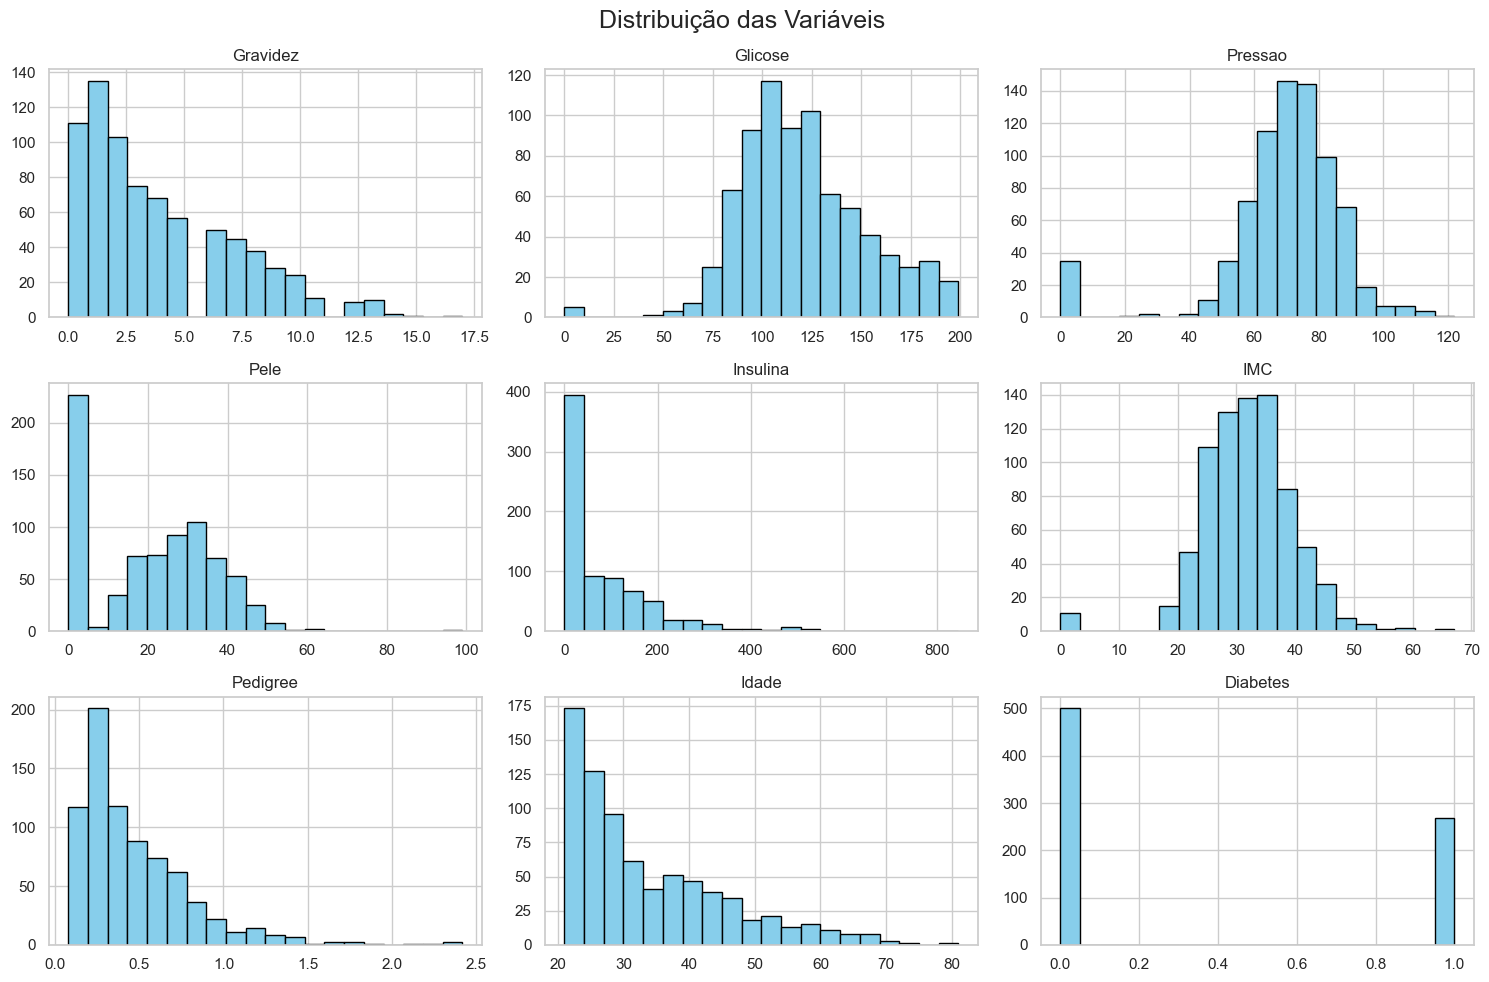

In [ ]:
#Criando o Histograma para cada variável
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribuição das Variáveis", fontsize=18)
plt.tight_layout()
plt.show()


## Boxplot para Exibir Outliers

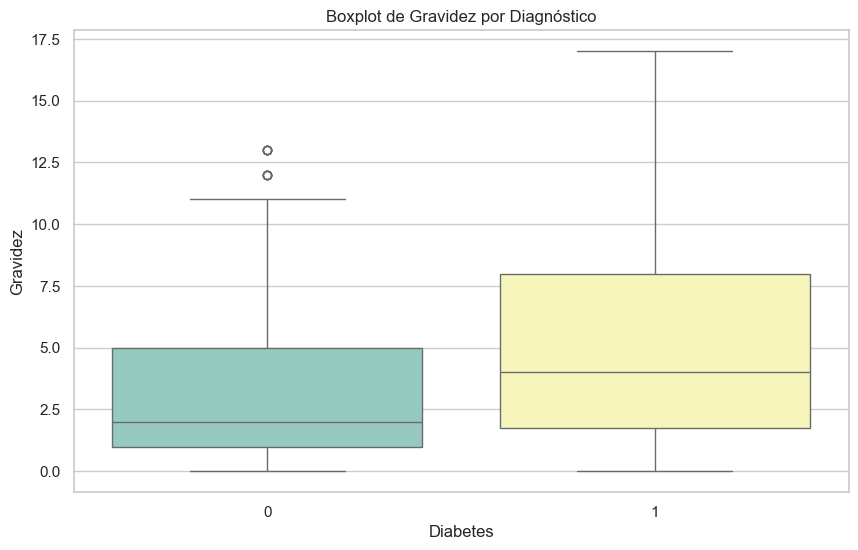

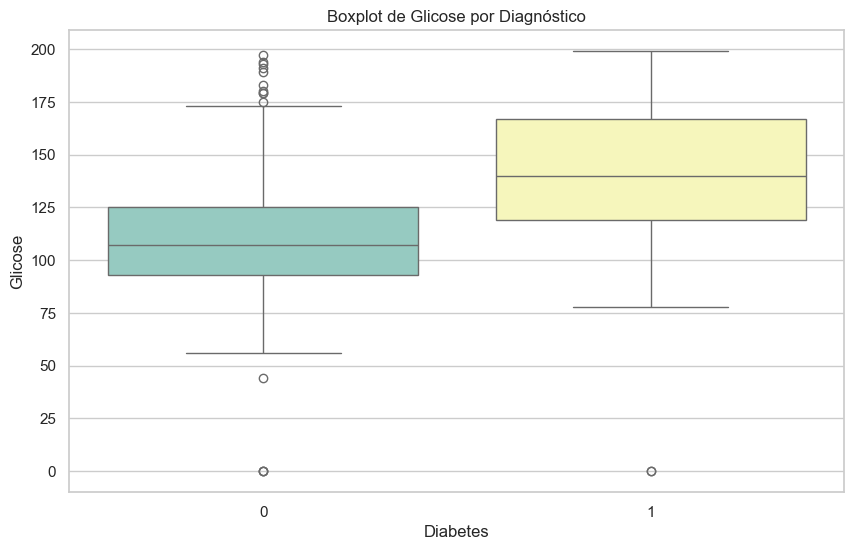

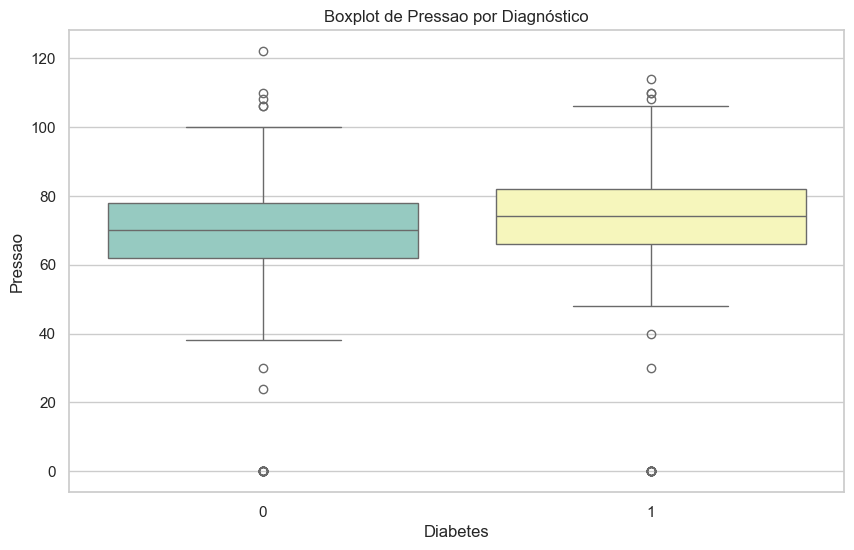

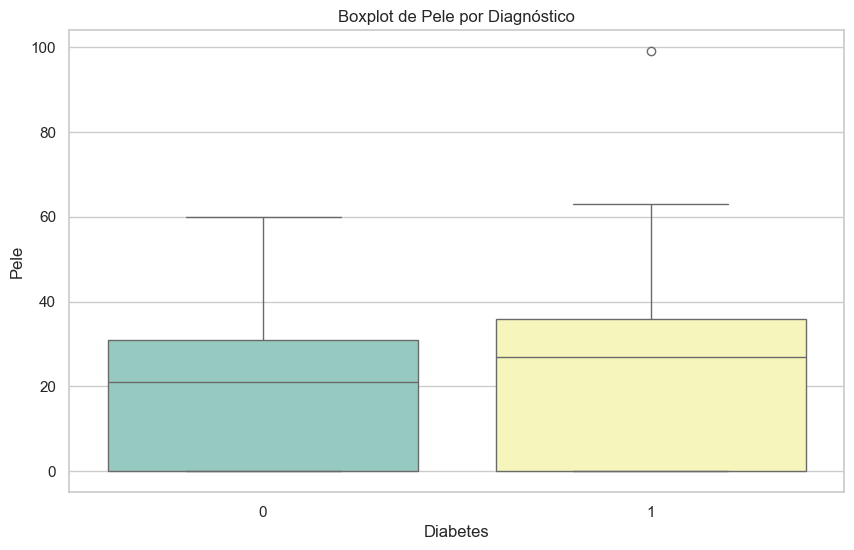

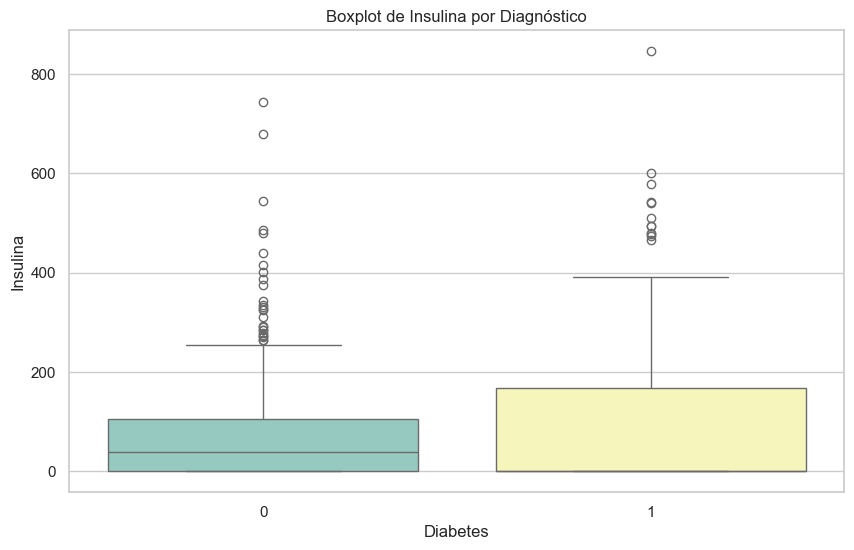

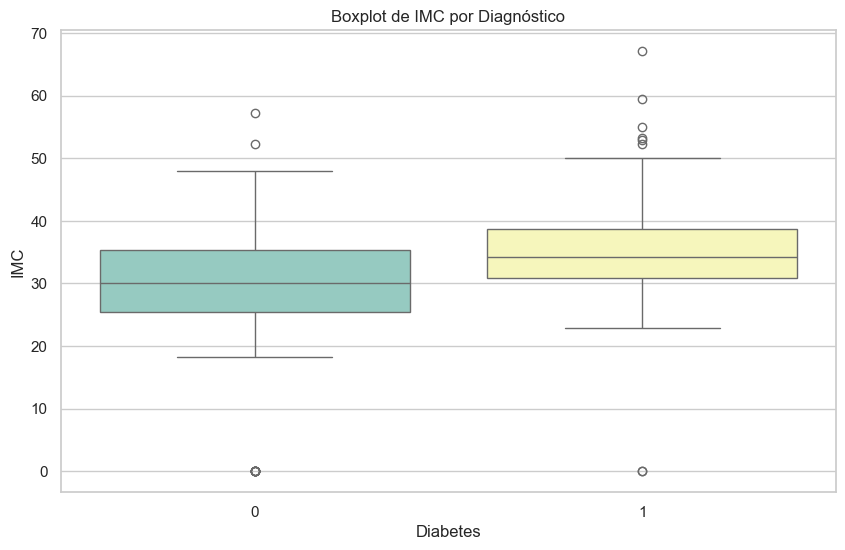

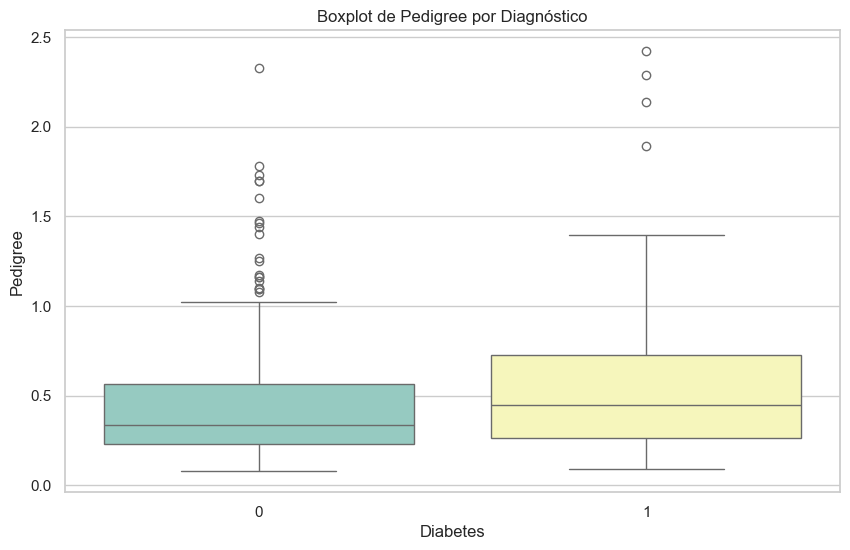

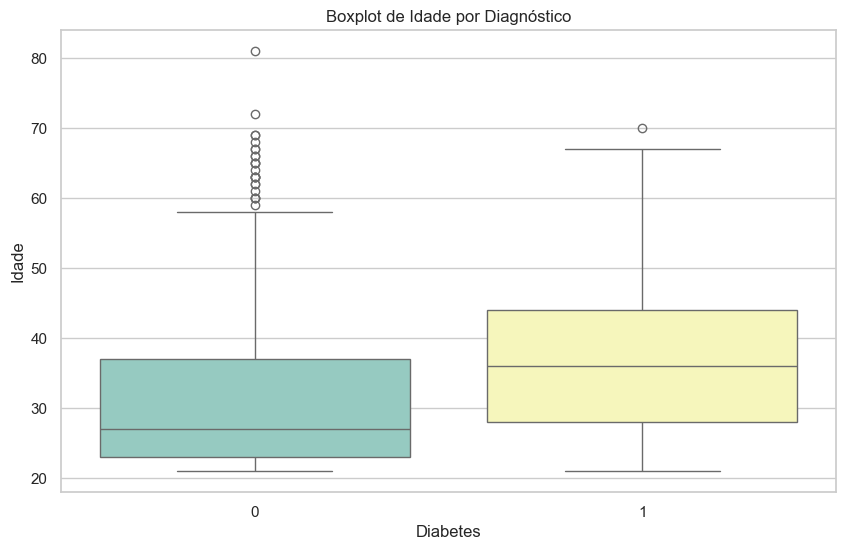

In [ ]:
#Criando os Boxplots para identificar outliers 
for coluna in df.columns[:-1]:  #exceto quem tem Diabetes 
    sns.boxplot(x='Diabetes', y=coluna, data=df, palette="Set3")
    plt.title(f"Boxplot de {coluna} por Diagnóstico")
    plt.show()


## Mapa de Calor Correlação

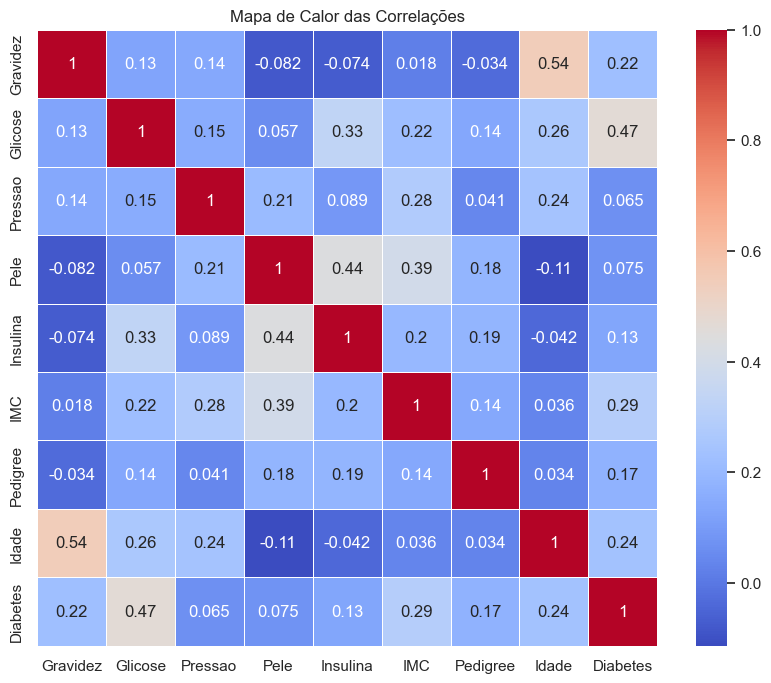

In [ ]:
#Correlação entre as variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor das Correlações")
plt.show()


## Insights Iniciais

Idades médias:
          count       mean        std   min   25%   50%   75%   max
Diabetes                                                           
0         500.0  31.190000  11.667655  21.0  23.0  27.0  37.0  81.0
1         268.0  37.067164  10.968254  21.0  28.0  36.0  44.0  70.0

Número de mulheres com mais de 3 filhos e diabetes: 155


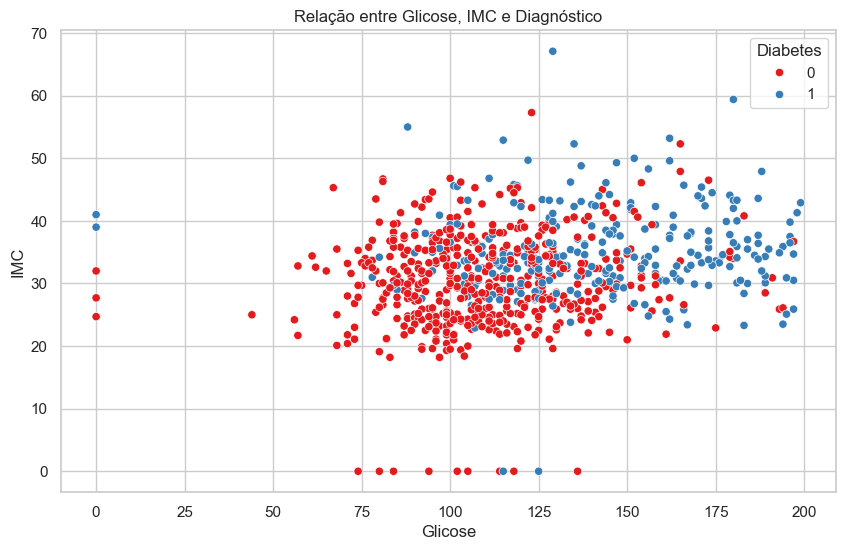

In [ ]:
#Faixa etária mais afetada
print("Idades médias:")
print(df.groupby('Diabetes')['Idade'].describe())

#Mulheres com mais de 3 filhos e com diabetes
maes_diabeticas = df[(df['Gravidez'] > 3) & (df['Diabetes'] == 1)]
print(f"\nNúmero de mulheres com mais de 3 filhos e diabetes: {len(maes_diabeticas)}")

#Relação entre glicose, IMC e diagnóstico
sns.scatterplot(data=df, x='Glicose', y='IMC', hue='Diabetes', palette='Set1')
plt.title("Relação entre Glicose, IMC e Diagnóstico")
plt.show()


## Visualizações

#### Distribuição de Diagnóstico por Idade e IMC

In [32]:
fig = px.scatter(
    df,
    x="Idade",
    y="IMC",
    color="Diabetes",
    title="Distribuição de Diagnóstico por Idade e IMC",
    labels={"Diabetes": "Diagnóstico (0 = Não, 1 = Sim)"},
    hover_data=["Gravidez", "Glicose", "Pressao"]
)
fig.show()

#### Tendência do Diagnóstico por Faixa Etária

In [33]:
bins = [20, 30, 40, 50, 60, 70, 80, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)

fig = px.histogram(
    df,
    x="Faixa_Etaria",
    color="Diabetes",
    barmode="group",
    title="Distribuição de Diabetes por Faixa Etária",
    category_orders={"Faixa_Etaria": labels}
)
fig.show()


#### Comparação dos Níveis de Glicose entre os Grupos

In [34]:
fig = px.box(
    df,
    x="Diabetes",
    y="Glicose",
    color="Diabetes",
    title="Distribuição de Glicose por Diagnóstico",
    labels={"Diabetes": "Diagnóstico (0 = Não, 1 = Sim)"}
)
fig.show()

#### Gráfico com Filtros Dinâmicos

In [35]:
fig = px.scatter(
    df,
    x="Glicose",
    y="IMC",
    color="Diabetes",
    facet_col="Faixa_Etaria",
    facet_col_wrap=3,  # ajusta para quebrar colunas em múltiplas linhas
    title="Glicose vs IMC por Faixa Etária e Diagnóstico",
    hover_data=["Gravidez", "Pressao", "Pedigree"]
)
fig.update_layout(height=800, width=900)
fig.show()



## Construção do Modelo Preditivo

### Preparação dos Dados

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separando as features e target
X = df.drop(columns=["Diabetes", "Faixa_Etaria"])  # Excluímos também a faixa categórica
y = df["Diabetes"]

#Dividindo o modelo em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Normalizando as variáveis numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Treinamento dos Modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Tentando importar o modelo XGBoost
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False

#Criando os modelos
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

if xgb_available:
    modelos["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

#Treinando os modelos
for nome, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)


### Avaliação dos Modelos

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

print("Avaliação dos Modelos:\n")

for nome, modelo in modelos.items():
    y_pred = modelo.predict(X_test_scaled)
    y_proba = modelo.predict_proba(X_test_scaled)[:, 1]

    print(f"🔍 {nome}")
    print(f"Acurácia:  {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precisão:  {precision_score(y_test, y_pred):.3f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.3f}")
    print(f"F1-Score:  {f1_score(y_test, y_pred):.3f}")
    print(f"ROC-AUC:   {roc_auc_score(y_test, y_proba):.3f}")
    print("-" * 40)


Avaliação dos Modelos:

🔍 Regressão Logística
Acurácia:  0.714
Precisão:  0.609
Recall:    0.519
F1-Score:  0.560
ROC-AUC:   0.823
----------------------------------------
🔍 Random Forest
Acurácia:  0.760
Precisão:  0.681
Recall:    0.593
F1-Score:  0.634
ROC-AUC:   0.815
----------------------------------------
🔍 KNN
Acurácia:  0.701
Precisão:  0.583
Recall:    0.519
F1-Score:  0.549
ROC-AUC:   0.740
----------------------------------------
🔍 XGBoost
Acurácia:  0.747
Precisão:  0.653
Recall:    0.593
F1-Score:  0.621
ROC-AUC:   0.806
----------------------------------------
